I noticed that there are lots of features that could probably be grouped together. How about we have a look at feature correlations next?

In [20]:
import pandas as pd
from dfply import mask, X

import seaborn as sns
import matplotlib.pyplot as plt

## Correlations

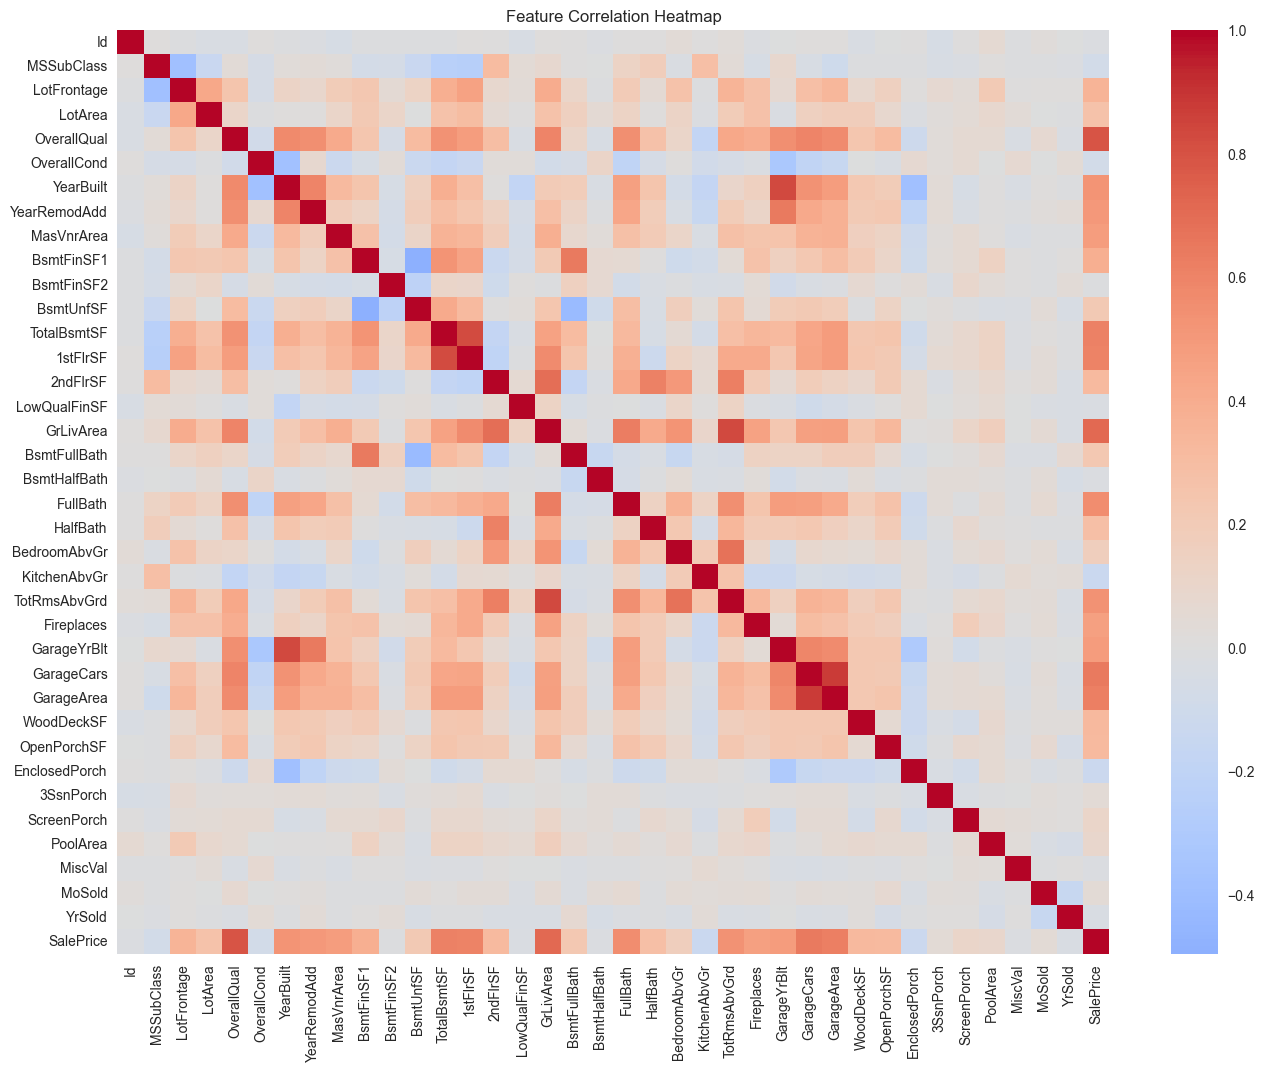

In [21]:
# Load the training data
df = pd.read_csv("../data/raw/train.csv")

# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

From the numerical features, I'm interested in the number of baths:

## Add no of baths

In [22]:
df['TotalBaths'] = df['FullBath'] + (0.5 * df['HalfBath'])
df['GarageFinish_Unf'] = df['GarageFinish'] == 'Unf'

In [23]:
top = ['OverallQual',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 'GarageFinish_Unf',
 'CentralAir',
 'TotalBaths',]

In [24]:
from pycaret.regression import *
experiment = setup(data=df[top + ['SalePrice']], target='SalePrice', session_id=123, transform_target=True, keep_features=top) 

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 8)"
4,Transformed data shape,"(1460, 8)"
5,Transformed train set shape,"(1021, 8)"
6,Transformed test set shape,"(439, 8)"
7,Numeric features,5
8,Categorical features,1
9,Keep features,7


In [25]:
model = compare_models() # 0.1666

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:42:50
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,21395.0583,1042827446.5156,31902.9274,0.8382,0.1666,0.1246,0.0670
lightgbm,Light Gradient Boosting Machine,22514.4851,1239895069.9386,34673.3376,0.8125,0.1734,0.1306,0.1590
et,Extra Trees Regressor,22669.9004,1332245427.4913,35285.3036,0.8004,0.1788,0.1312,0.0930
rf,Random Forest Regressor,22900.1013,1429575922.3767,36685.2450,0.7885,0.1783,0.1323,0.1300
ada,AdaBoost Regressor,26979.5750,1568982420.8807,39191.0835,0.7596,0.2006,0.1548,0.0700
dt,Decision Tree Regressor,30566.4364,2350256849.8765,47389.6492,0.6389,0.2445,0.1782,0.0240
lr,Linear Regression,23462.5218,2540709533.3626,43429.1773,0.6221,0.1822,0.1369,1.4580
lar,Least Angle Regression,23462.5218,2540709533.3626,43429.1773,0.6221,0.1822,0.1369,0.0200
ridge,Ridge Regression,23459.2458,2543729985.3365,43440.8381,0.6217,0.1822,0.1369,0.0210
br,Bayesian Ridge,23454.2489,2551853294.3092,43475.3246,0.6205,0.1821,0.1369,0.0200


In [26]:
import plotly.express as px
px.histogram(x=model.feature_importances_, y=model.feature_names_in_).update_yaxes(categoryorder='total ascending')

Small improvement, we keep it.

## Add second floor

In [27]:
experiment

## Check categorical features

In [28]:
for col in df.select_dtypes(include='object').columns:
    fig = px.box(df.fillna('unknown'), x='SalePrice', color=col)
    fig.show()

## Add MSZoning

In [29]:
top = ['OverallQual',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 'GarageFinish_Unf',
 'CentralAir',
 'TotalBaths',
 'MSZoning',]

In [30]:
from pycaret.regression import *
experiment = setup(data=df[top + ['SalePrice']], target='SalePrice', session_id=123, transform_target=True, keep_features=top) 

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 9)"
4,Transformed data shape,"(1460, 13)"
5,Transformed train set shape,"(1021, 13)"
6,Transformed test set shape,"(439, 13)"
7,Numeric features,5
8,Categorical features,2
9,Keep features,8


In [31]:
model = compare_models() # 0.1561

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,20819.6835,1044690379.8784,31688.0614,0.8392,0.1561,0.1184,0.0920
lightgbm,Light Gradient Boosting Machine,21897.3203,1205268177.7806,34258.5554,0.8174,0.1670,0.1251,0.1760
et,Extra Trees Regressor,22278.2683,1232541602.9374,34252.5574,0.8116,0.1706,0.1274,0.1530
rf,Random Forest Regressor,22144.8443,1377490571.3390,36060.8689,0.7959,0.1700,0.1267,0.1980
ada,AdaBoost Regressor,26790.7780,1528372040.0263,38620.5478,0.7675,0.1955,0.1538,0.0840
dt,Decision Tree Regressor,29430.0150,2200710024.6505,46008.2168,0.6612,0.2315,0.1717,0.0490
lr,Linear Regression,22732.2565,2279679248.1028,41887.9216,0.6597,0.1727,0.1297,0.4380
lar,Least Angle Regression,22732.2565,2279679248.1027,41887.9216,0.6597,0.1727,0.1297,0.0560
ridge,Ridge Regression,22724.0869,2283849640.8536,41897.5598,0.6591,0.1727,0.1298,0.0400
br,Bayesian Ridge,22725.7970,2285538126.8949,41902.4118,0.6589,0.1729,0.1299,0.0500


In [33]:
df[top].isna().sum()

OverallQual         0
GrLivArea           0
GarageCars          0
YearBuilt           0
GarageFinish_Unf    0
CentralAir          0
TotalBaths          0
MSZoning            0
dtype: int64

In [ ]:
experiment = setup(data=df[top + ['SalePrice']], target='SalePrice', session_id=123, transform_target=True, keep_features=top) 